In [526]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import (
    ttest_ind, pearsonr, spearmanr, kendalltau,
    pointbiserialr, chi2_contingency
)

In [527]:
df = pd.read_csv("crc_dataset.csv")
df.head()

,Participant_ID,Age,Gender,BMI,Lifestyle,Ethnicity,Family_History_CRC,Pre-existing Conditions,Carbohydrates (g),Proteins (g),Fats (g),Vitamin A (IU),Vitamin C (mg),Iron (mg),CRC_Risk
0,1001,63,Female,21.6,Sedentary,Hispanic,Yes,Diabetes,245,98,41,4176,97,15.3,0
1,1002,76,Male,31.4,Smoker,Hispanic,No,Obesity,398,56,61,3400,38,9.5,1
2,1003,53,Female,24.3,Moderate Exercise,Asian,No,NaN,375,79,59,5104,51,14.4,0
3,1004,39,Male,19.5,Sedentary,Asian,Yes,NaN,325,98,64,6050,47,7.3,0
4,1005,67,Male,34.5,Moderate Exercise,Asian,No,Obesity,169,65,54,5233,105,12.0,0


In [528]:
df = pd.read_csv("crc_dataset1.csv")
df.head()

,Participant_ID,Age,Gender,BMI,Lifestyle,Family_History_CRC,Pre-existing Conditions,Carbohydrates (g),Proteins (g),Fats (g),Vitamin A (IU),Vitamin C (mg),Iron (mg),CRC_Risk
0,1001,63,Female,21.6,Sedentary,Yes,NaN,188,61,49,3223,107,14.6,0
1,1002,76,Male,31.4,Smoker,Yes,Hypertension,221,77,51,3350,82,9.8,1
2,1003,53,Female,24.3,Moderate Exercise,No,Hypertension,174,73,77,4928,33,6.4,0
3,1004,39,Male,19.5,Sedentary,No,Diabetes,226,70,83,3348,111,11.4,0
4,1005,67,Male,34.5,Moderate Exercise,No,Hypertension,309,59,94,7277,54,6.9,0


In [529]:
df.describe()

,Participant_ID,Age,BMI,Carbohydrates (g),Proteins (g),Fats (g),Vitamin A (IU),Vitamin C (mg),Iron (mg),CRC_Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1500.500000,52.443000,26.795300,278.933000,84.58900,69.417000,5966.432000,74.681000,12.25780,0.154000
std,288.819436,15.909993,4.794229,72.154825,19.93458,17.454104,1706.916526,25.925998,4.26843,0.361129
min,1001.000000,25.000000,18.600000,150.000000,50.00000,40.000000,3012.000000,30.000000,5.00000,0.000000
25%,1250.750000,39.000000,22.500000,218.000000,67.00000,54.000000,4455.000000,52.000000,8.60000,0.000000
50%,1500.500000,53.000000,27.000000,280.000000,85.00000,69.000000,5916.000000,75.000000,12.30000,0.000000
75%,1750.250000,66.000000,31.000000,341.000000,102.00000,84.000000,7474.000000,98.000000,15.70000,0.000000
max,2000.000000,79.000000,35.000000,399.000000,119.00000,99.000000,8993.000000,119.000000,20.00000,1.000000


In [530]:
df.isnull().sum()

Participant_ID               0
Age                          0
Gender                       0
BMI                          0
Lifestyle                    0
Family_History_CRC           0
Pre-existing Conditions    241
Carbohydrates (g)            0
Proteins (g)                 0
Fats (g)                     0
Vitamin A (IU)               0
Vitamin C (mg)               0
Iron (mg)                    0
CRC_Risk                     0
dtype: int64

In [531]:
df["Pre-existing Conditions"] = df["Pre-existing Conditions"].fillna("Unknown")

In [532]:
df.isnull().sum()

Participant_ID             0
Age                        0
Gender                     0
BMI                        0
Lifestyle                  0
Family_History_CRC         0
Pre-existing Conditions    0
Carbohydrates (g)          0
Proteins (g)               0
Fats (g)                   0
Vitamin A (IU)             0
Vitamin C (mg)             0
Iron (mg)                  0
CRC_Risk                   0
dtype: int64

### Histograms for continuous variables

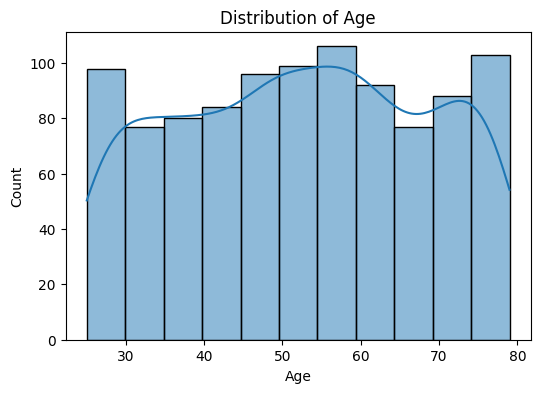

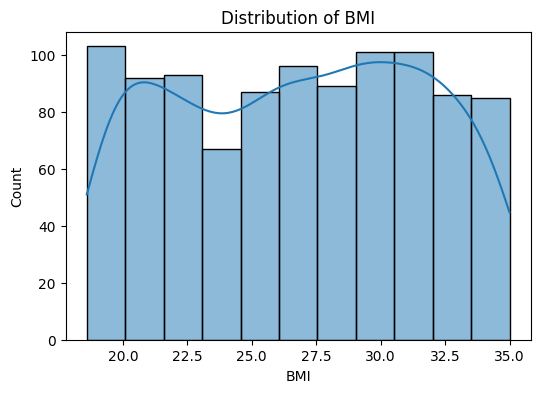

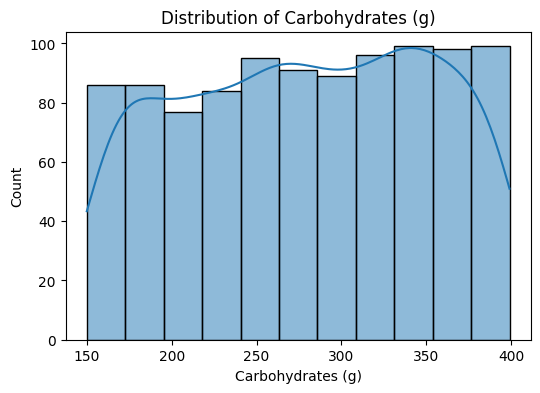

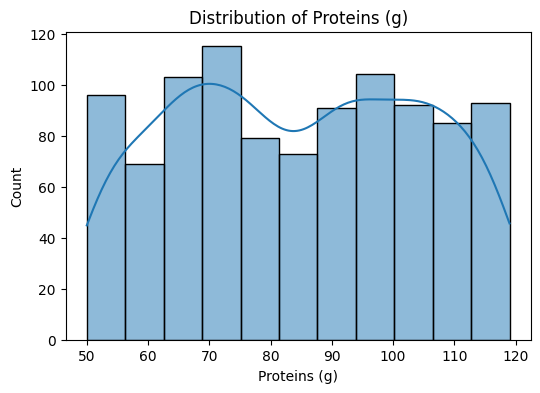

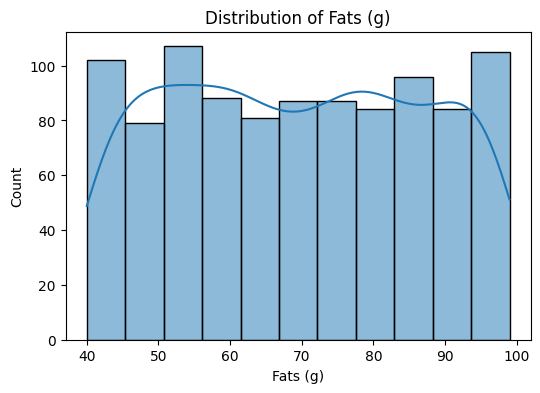

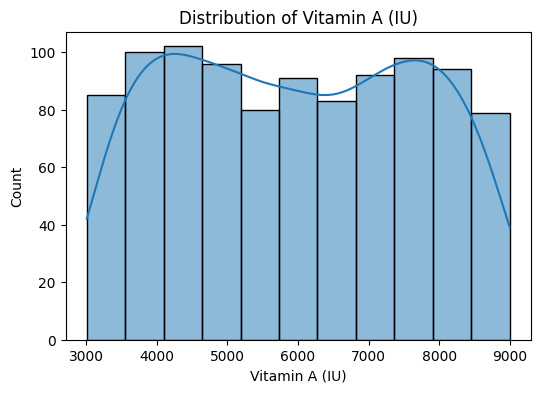

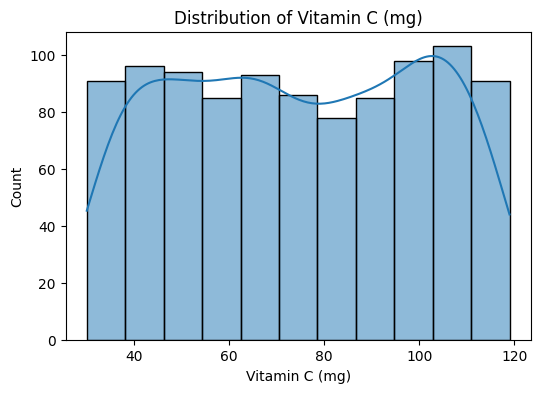

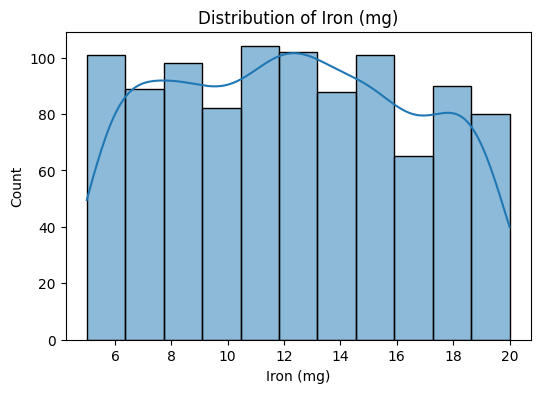

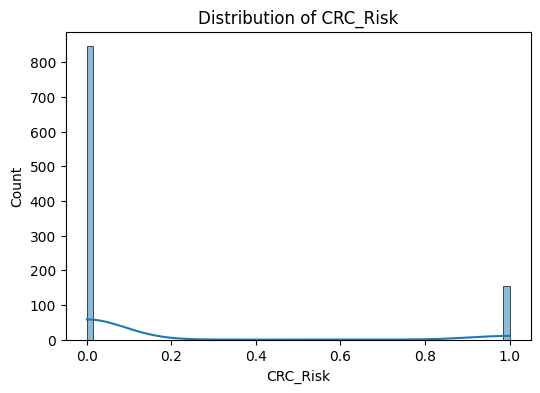

In [533]:
numeric_cols = [
    "Age", "BMI", "Carbohydrates (g)", "Proteins (g)", "Fats (g)",
    "Vitamin A (IU)", "Vitamin C (mg)", "Iron (mg)", "CRC_Risk"
]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

### Boxplots

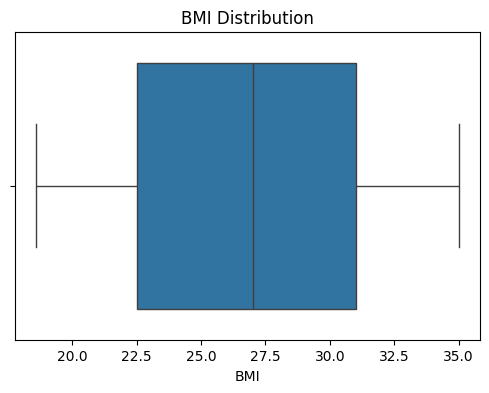

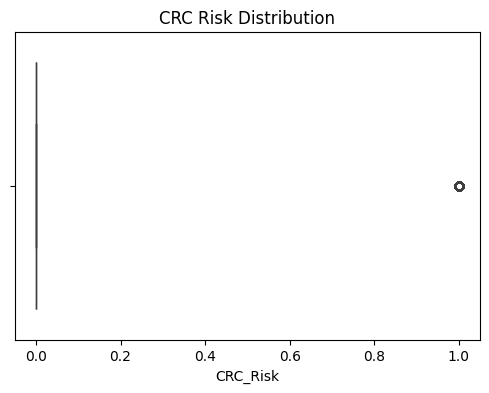

In [534]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["BMI"])
plt.title("BMI Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df["CRC_Risk"])
plt.title("CRC Risk Distribution")
plt.show()

In [535]:
corr, p = spearmanr(df["Family_History_CRC"], df["CRC_Risk"])
print("Spearman correlation:", corr, "p-value:", p)

Spearman correlation: 0.17820404583069263 p-value: 1.3972004408157138e-08


In [536]:
groups = [group["BMI"].values for name, group in df.groupby("Lifestyle")]

from scipy.stats import f_oneway
f_stat, p = f_oneway(*groups)

print("ANOVA: BMI across Lifestyle groups")
print("F-statistic:", f_stat)
print("p-value:", p)

ANOVA: BMI across Lifestyle groups
F-statistic: 0.9136627397498878
p-value: 0.43370797952931606


In [537]:
corr, p = pearsonr(df["BMI"], df["Carbohydrates (g)"])
print("Pearson correlation (BMI × Carbohydrates):", corr, "p-value:", p)

Pearson correlation (BMI × Carbohydrates): -0.003145761531655766 p-value: 0.9208575688878453


In [538]:
corr, p = spearmanr(df["CRC_Risk"], df["Vitamin C (mg)"])
print("Spearman correlation (CRC_Risk × Vitamin C):", corr, "p-value:", p)

Spearman correlation (CRC_Risk × Vitamin C): 0.051348986832315285 p-value: 0.10462419437117072


In [539]:
corr, p = kendalltau(df["BMI"], df["CRC_Risk"])
print("Kendall Tau (BMI × CRC_Risk):", corr, "p-value:", p)

Kendall Tau (BMI × CRC_Risk): 0.23603351384302312 p-value: 8.629749533859511e-20


In [540]:
corr, p = kendalltau(df["Age"], df["CRC_Risk"])
print("Kendall Tau (Age × CRC_Risk):", corr, "p-value:", p)

Kendall Tau (Age × CRC_Risk): 0.16442085110070725 p-value: 2.881393768683404e-10


In [541]:
df["Pre-existing Conditions"].unique()

array(['Unknown', 'Hypertension', 'Diabetes', 'Obesity'], dtype=object)

In [542]:
df["PreCon_num"] = df["Pre-existing Conditions"].map({
    "Unknown": 0,
    "Hypertension": 1,
    "Diabetes": 1,
    "Obesity": 1
})

In [543]:
corr, p = spearmanr(df["PreCon_num"], df["CRC_Risk"])
print("Spearman correlation:", corr, "p-value:", p)

Spearman correlation: -0.03165034960012621 p-value: 0.3173731229930538


In [544]:
df["Lifestyle"].value_counts()

Lifestyle
Moderate Exercise    261
Sedentary            258
Smoker               251
Active               230
Name: count, dtype: int64

In [545]:
df["Lifestyle"].unique()

array(['Sedentary', 'Smoker', 'Moderate Exercise', 'Active'], dtype=object)

In [546]:
df["Lifestyle_num"] = df["Lifestyle"].map({
    "Active": 0,
    "Moderate Exercise": 1,
    "Sedentary": 2,
    "Smoker": 3
})

In [547]:
df["Lifestyle_num"].isna().sum()

np.int64(0)

In [548]:
corr, p = spearmanr(df["Lifestyle_num"], df["CRC_Risk"])
print("Kendall Tau (Lifestyle_num × CRC_Risk):", corr, "p-value:", p)

Kendall Tau (Lifestyle_num × CRC_Risk): 0.2562783893629707 p-value: 1.8417469341486771e-16


In [549]:
table = pd.crosstab(df["Family_History_CRC"], df["Gender"])
chi2, p, _, _ = chi2_contingency(table)

phi = np.sqrt(chi2 / df.shape[0])
print("Phi coefficient (Family History × Gender):", phi, "p-value:", p)


Phi coefficient (Family History × Gender): 0.01901425003092171 p-value: 0.5476512567237517


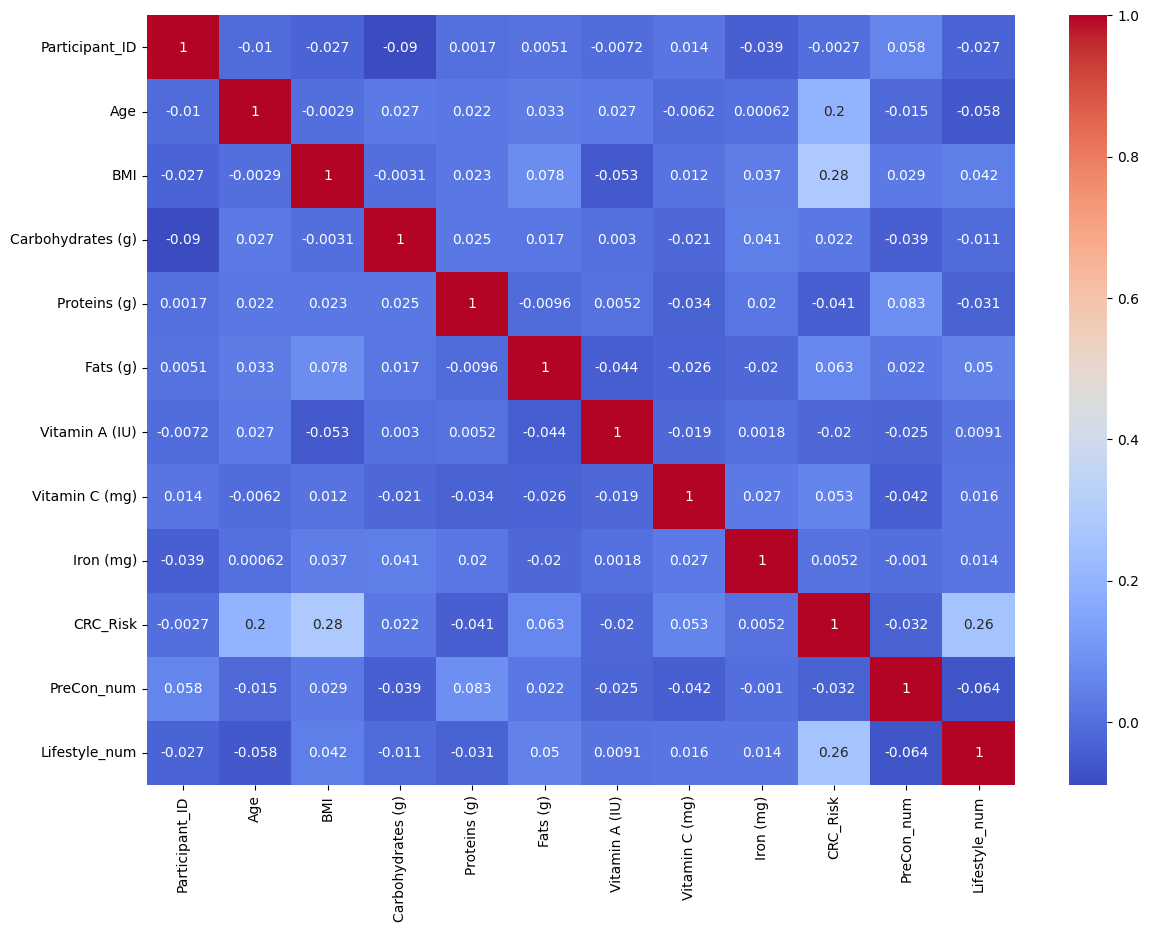

In [550]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14,10))  
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()